In [67]:
import polars as pl
import matplotlib.pyplot as plt
import hvplot.polars
import pandas as pd
import seaborn as sns

from src.sec_8k_preprocess import preprocess_sec_8k_nlp
from src.utils.event_study import event_study, compute_caar_ci, plot_caar_ci, plot_corr_abn_iti_ar

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df_finbert = preprocess_sec_8k_nlp(item_to_parse="8.01", nlp_mode="finbert")
df_finbert.head()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01_finbert.parquet


permno,filing_date,report_date,report_year,days_between_report_and_filing,sentiment_score,item_txt
i64,date,date,i32,i32,f32,str
14286,2006-12-29,2006-12-26,2006,3,0.451225,"""Other Events. On December 26,…"
14286,2004-10-13,2004-10-12,2004,1,0.916354,""" Other Events. On October 12, …"
68523,2005-09-21,2005-09-16,2005,5,0.525634,"""Other Events On Septem…"
39482,2010-02-02,2010-01-28,2010,5,0.829918,"""ITEM 8.01 OTHER EVENTS Americ…"
39482,2009-12-11,2009-12-09,2009,2,0.619829,"""Item 8.01. Other Events. On …"


In [4]:
df_finbert_mean_chunk = preprocess_sec_8k_nlp(item_to_parse="8.01", nlp_mode="finbert_mean_chunk")
df_finbert_mean_chunk.head()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01_finbert_mean_chunk.parquet


permno,filing_date,report_date,report_year,days_between_report_and_filing,item_txt,sentiment_score
i64,date,date,i32,i32,str,f64
14286,2006-12-29,2006-12-26,2006,3,"""Other Events. On December 26,…",0.672787
14286,2004-10-13,2004-10-12,2004,1,""" Other Events. On October 12, …",0.912676
68523,2005-09-21,2005-09-16,2005,5,"""Other Events On Septem…",0.497292
39482,2010-02-02,2010-01-28,2010,5,"""ITEM 8.01 OTHER EVENTS Americ…",0.822607
39482,2009-12-11,2009-12-09,2009,2,"""Item 8.01. Other Events. On …",0.694882


In [5]:
df_mistral_finbert = preprocess_sec_8k_nlp(item_to_parse="8.01", nlp_mode="mistral_summary_to_finbert")
df_mistral_finbert.head()

[INFO] Loading existing preprocessed file: data/preprocessed/item_8_01_mistral_summary_to_finbert.parquet


permno,filing_date,report_date,report_year,days_between_report_and_filing,item_txt,sentiment_score
i64,date,date,i32,i32,str,f64
14286,2006-12-29,2006-12-26,2006,3,"""Other Events. On December 26,…",0.018965
14286,2004-10-13,2004-10-12,2004,1,""" Other Events. On October 12, …",0.921408
68523,2005-09-21,2005-09-16,2005,5,"""Other Events On Septem…",0.832633
39482,2010-02-02,2010-01-28,2010,5,"""ITEM 8.01 OTHER EVENTS Americ…",0.257812
39482,2009-12-11,2009-12-09,2009,2,"""Item 8.01. Other Events. On …",0.056182


In [6]:
# remove rows with no filing date
df_events_8_01 = df_finbert.filter(pl.col('filing_date').is_not_null())
df_events_8_01 = df_events_8_01.rename({'report_date': 'event_date'})
df_events_8_01 = df_events_8_01.select(['permno', 'event_date'])

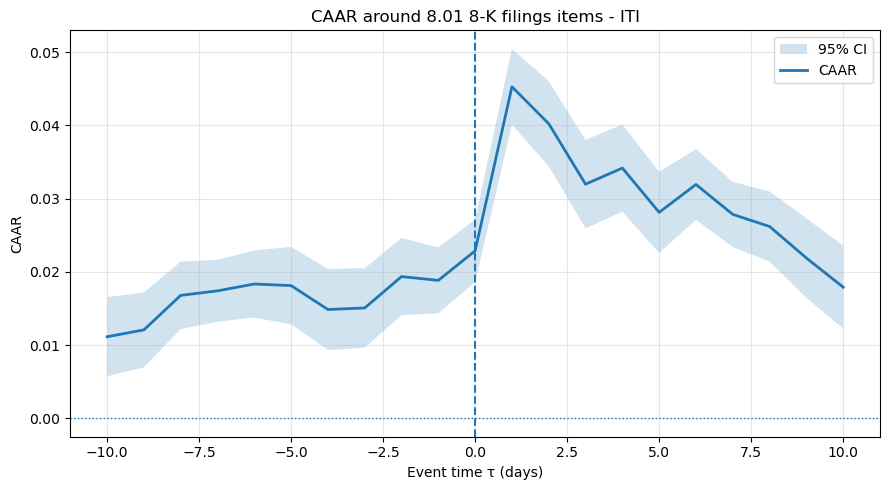

In [7]:
item_8_01_results_iti = event_study(
    df_events=df_events_8_01.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject = 'ITI')

item_8_01_caar_iti = compute_caar_ci(item_8_01_results_iti)
plot_caar_ci(item_8_01_caar_iti, title='CAAR around 8.01 8-K filings items - ITI')

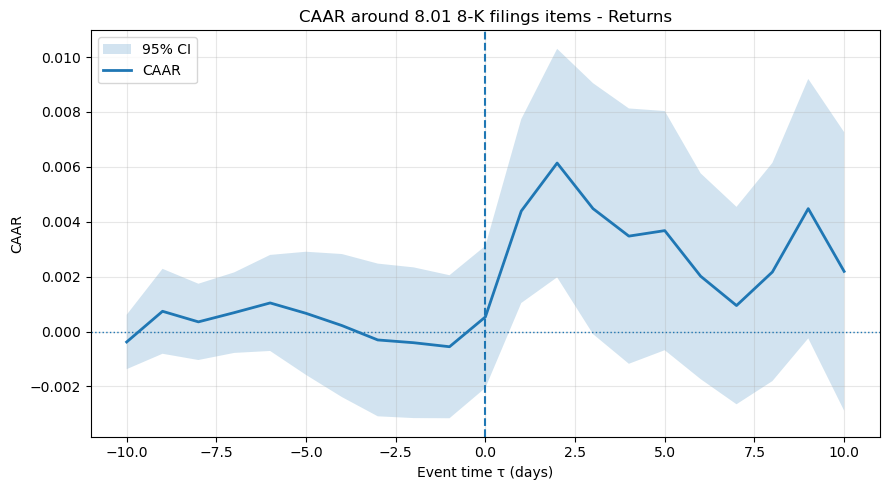

In [8]:
item_8_01_results_returns = event_study(
    df_events=df_events_8_01.to_pandas(),
    window_before=10,
    window_after=10,
    est_window=500,
    gap=30,
    min_obs=250,
    market_model='fama-mom',
    subject = 'returns')

item_8_01_caar_returns = compute_caar_ci(item_8_01_results_returns)
plot_caar_ci(item_8_01_caar_returns, title='CAAR around 8.01 8-K filings items - Returns')

In [9]:
# Select the sentiment_score column from each df
s1 = df_finbert.select(pl.col('sentiment_score').alias('finbert'))
s2 = df_finbert_mean_chunk.select(pl.col('sentiment_score').alias('finbert_mean'))
s3 = df_mistral_finbert.select(pl.col('sentiment_score').alias('mistral_finbert'))

# Horizontal concat to get them side by side
df_finbert_stats = pl.concat([s1, s2, s3], how='horizontal')

# Show stats
df_finbert_stats.describe()

statistic,finbert,finbert_mean,mistral_finbert
str,f64,f64,f64
"""count""",13359.0,13359.0,13359.0
"""null_count""",0.0,0.0,0.0
"""mean""",0.73537,0.757957,0.607463
"""std""",0.318212,0.286426,0.396234
"""min""",-0.925356,-0.925658,-0.93411
"""25%""",0.731961,0.764775,0.36946
"""50%""",0.871535,0.873363,0.810242
"""75%""",0.906929,0.906916,0.896484
"""max""",0.9384,0.937808,0.938408


In [10]:
sentiment_finbert = df_finbert.filter(pl.col('sentiment_score').is_not_null()).select(['permno', 'filing_date', 'sentiment_score'])
sentiment_finbert = sentiment_finbert.rename({'filing_date': 'event_date'})

# select top 25% sentiment scores
sent_finbert_top_25 = sentiment_finbert.filter(pl.col('sentiment_score') >= sentiment_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())

# select bottom 25% sentiment scores
sent_finbert_bottom_25 = sentiment_finbert.filter(pl.col('sentiment_score') <= sentiment_finbert.select(pl.col('sentiment_score').quantile(0.25)).item())

# select middle 50% sentiment scores
sent_finbert_middle_50 = sentiment_finbert.filter(
    (pl.col('sentiment_score') > sentiment_finbert.select(pl.col('sentiment_score').quantile(0.25)).item()) &
    (pl.col('sentiment_score') < sentiment_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())
)

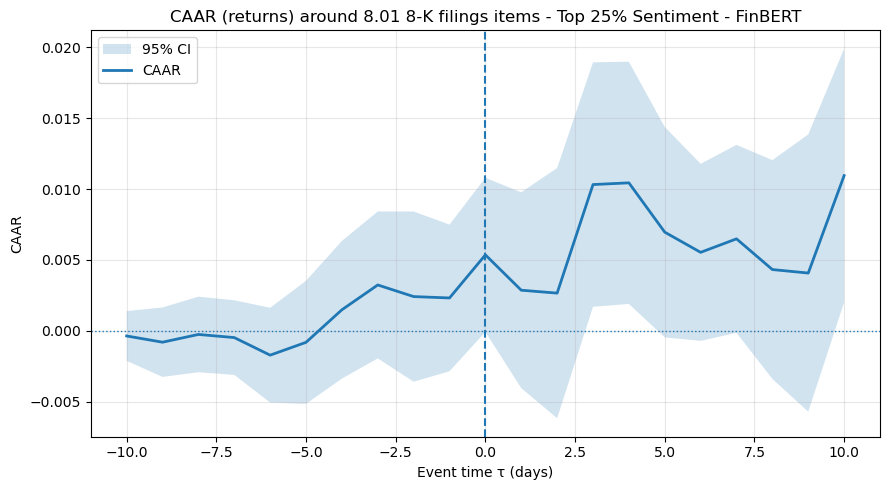

In [22]:
results_finbert_top_25_returns = event_study(
        df_events=sent_finbert_top_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_finbert_top_25_returns = compute_caar_ci(results_finbert_top_25_returns)
plot_caar_ci(caar_finbert_top_25_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Top 25% Sentiment - FinBERT')

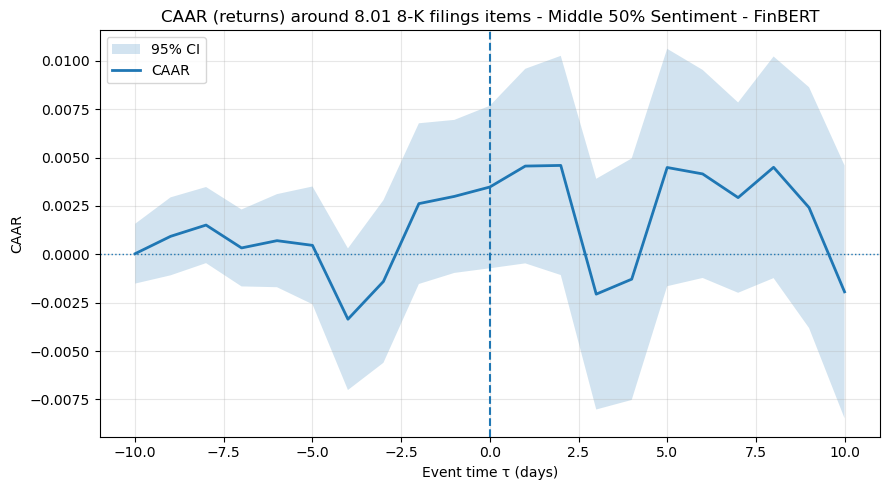

In [23]:
results_finbert_middle_50_returns = event_study(
        df_events=sent_finbert_middle_50.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_finbert_middle_50_returns = compute_caar_ci(results_finbert_middle_50_returns)
plot_caar_ci(caar_finbert_middle_50_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Middle 50% Sentiment - FinBERT')

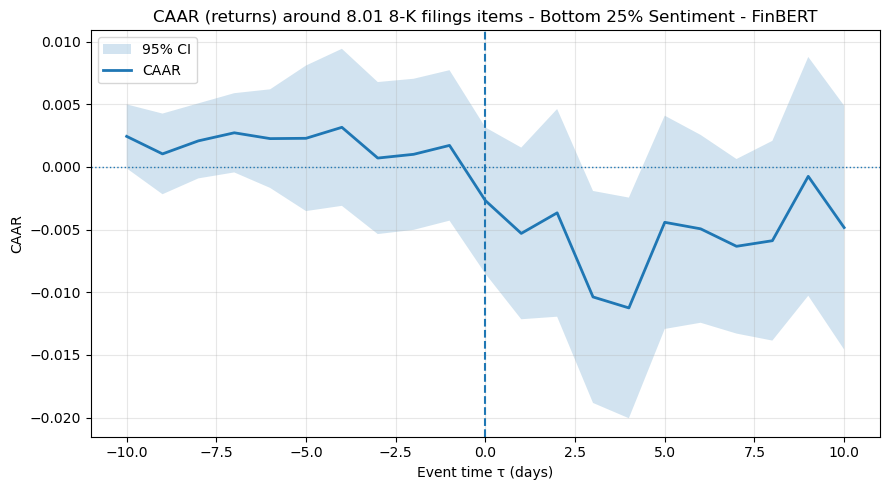

In [24]:
results_finbert_bottom_25_returns = event_study(
        df_events=sent_finbert_bottom_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_finbert_bottom_25_returns = compute_caar_ci(results_finbert_bottom_25_returns)
plot_caar_ci(caar_finbert_bottom_25_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Bottom 25% Sentiment - FinBERT')

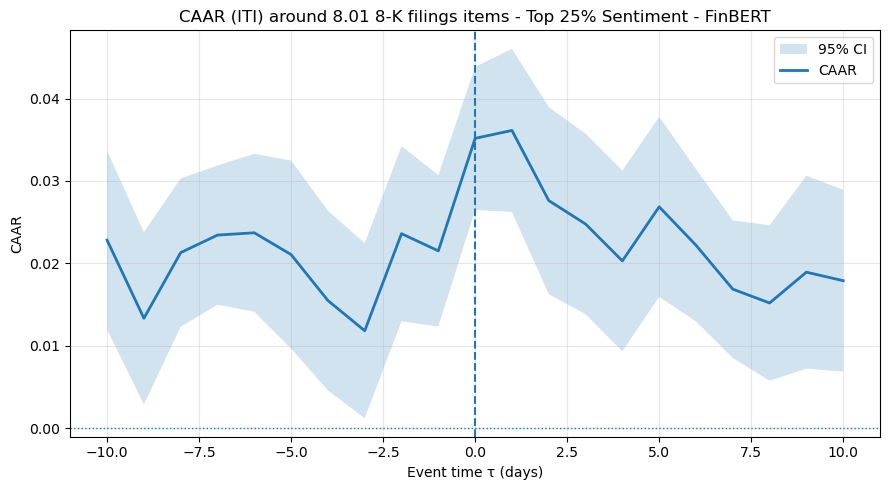

In [25]:
results_finbert_top_25_iti = event_study(
        df_events=sent_finbert_top_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_finbert_top_25_iti = compute_caar_ci(results_finbert_top_25_iti)
plot_caar_ci(caar_finbert_top_25_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Top 25% Sentiment - FinBERT')

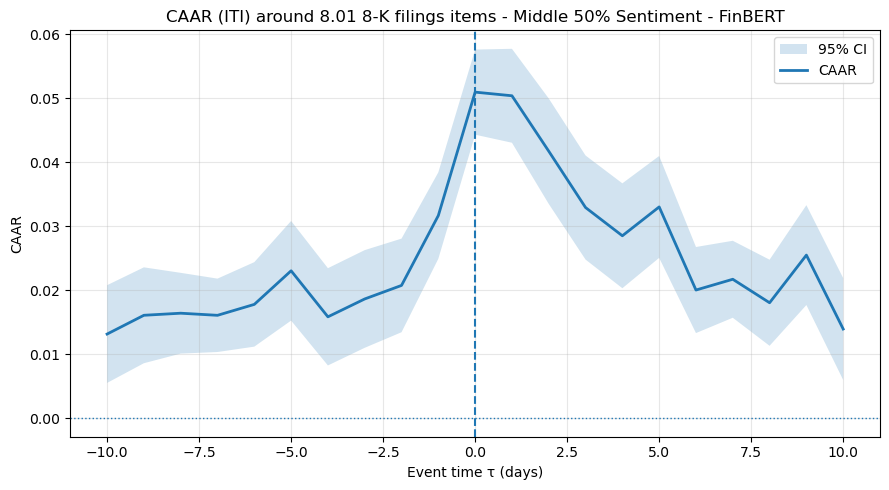

In [26]:
results_finbert_middle_50_iti = event_study(
        df_events=sent_finbert_middle_50.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_finbert_middle_50_iti = compute_caar_ci(results_finbert_middle_50_iti)
plot_caar_ci(caar_finbert_middle_50_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Middle 50% Sentiment - FinBERT')

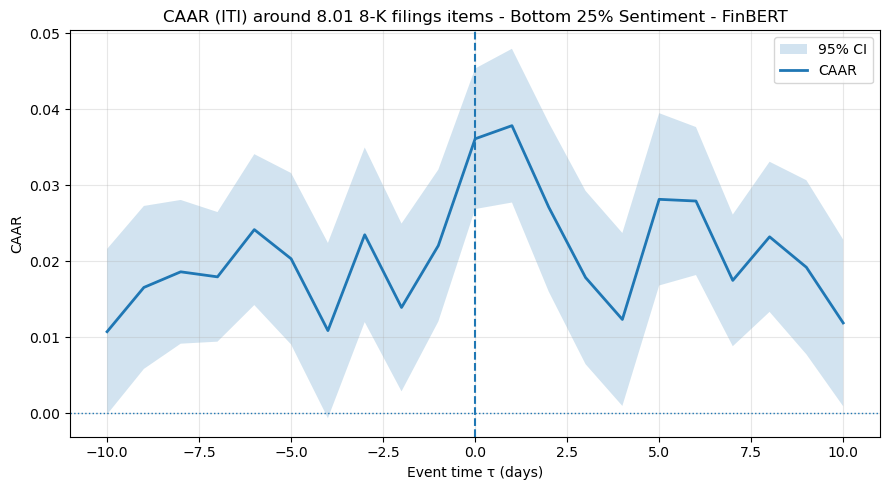

In [27]:
results_finbert_bottom_25_iti = event_study(
        df_events=sent_finbert_bottom_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_finbert_bottom_25_iti = compute_caar_ci(results_finbert_bottom_25_iti)
plot_caar_ci(caar_finbert_bottom_25_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Bottom 25% Sentiment - FinBERT')

In [28]:
sentiment_finbert_mean = df_finbert_mean_chunk.filter(pl.col('sentiment_score').is_not_null()).select(['permno', 'filing_date', 'sentiment_score'])
sentiment_finbert_mean = sentiment_finbert_mean.rename({'filing_date': 'event_date'})

# select top 25% sentiment scores
sent_finbert_mean_top_25 = sentiment_finbert_mean.filter(pl.col('sentiment_score') >= sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.75)).item())

# select bottom 25% sentiment scores
sent_finbert_mean_bottom_25 = sentiment_finbert_mean.filter(pl.col('sentiment_score') <= sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.25)).item())

# select middle 50% sentiment scores
sent_finbert_mean_middle_50 = sentiment_finbert_mean.filter(
    (pl.col('sentiment_score') > sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.25)).item()) &
    (pl.col('sentiment_score') < sentiment_finbert_mean.select(pl.col('sentiment_score').quantile(0.75)).item())
)

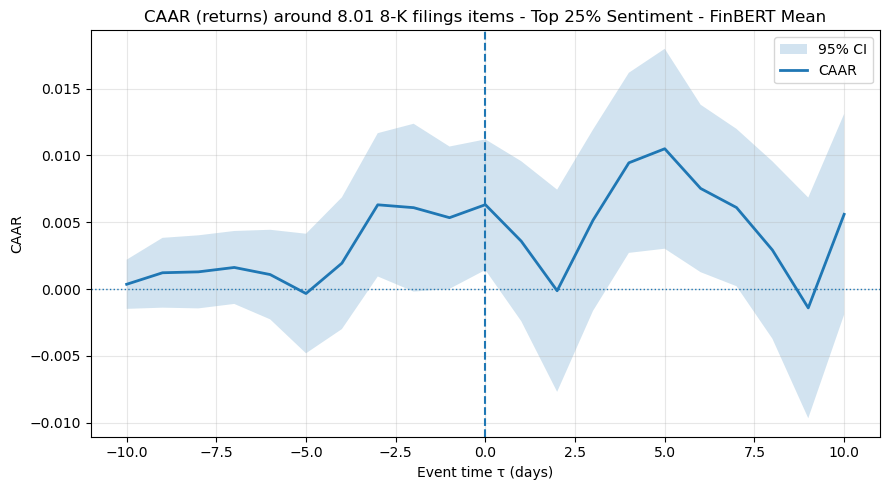

In [29]:
results_finbert_mean_top_25_returns = event_study(
        df_events=sent_finbert_mean_top_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_finbert_mean_top_25_returns = compute_caar_ci(results_finbert_mean_top_25_returns)
plot_caar_ci(caar_finbert_mean_top_25_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Top 25% Sentiment - FinBERT Mean')

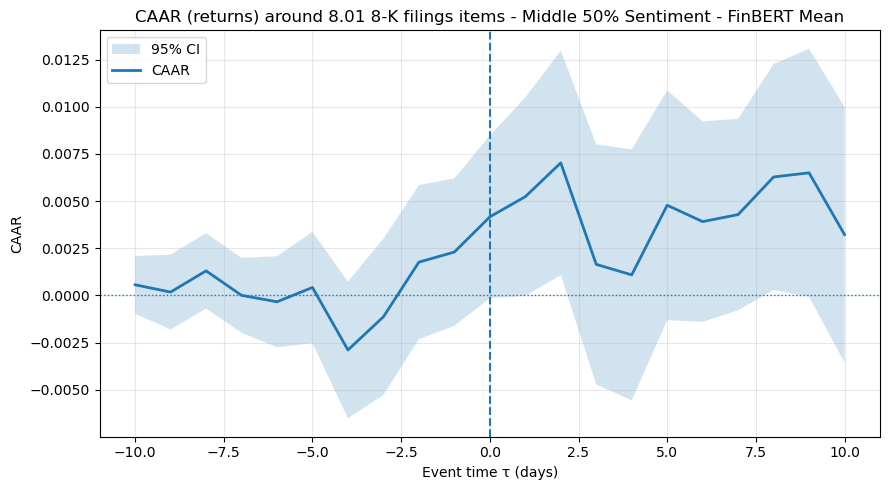

In [30]:
results_finbert_mean_middle_50_returns = event_study(
        df_events=sent_finbert_mean_middle_50.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_finbert_mean_middle_50_returns = compute_caar_ci(results_finbert_mean_middle_50_returns)
plot_caar_ci(caar_finbert_mean_middle_50_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Middle 50% Sentiment - FinBERT Mean')

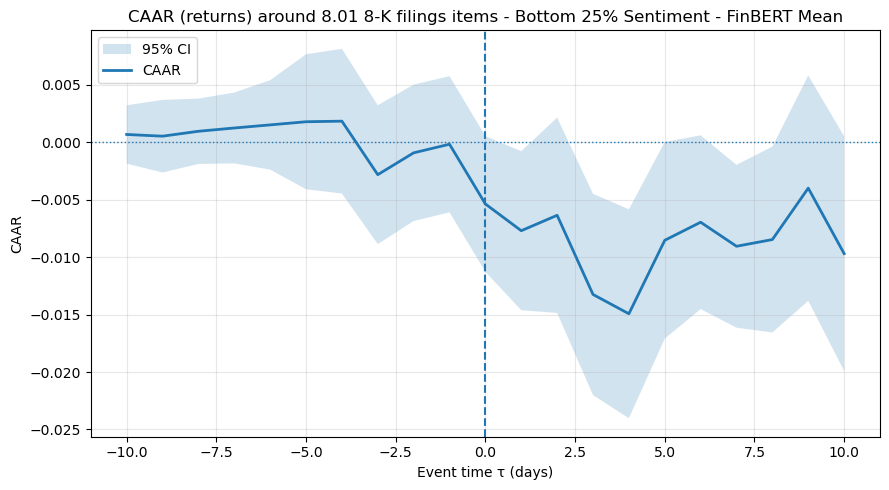

In [31]:
results_finbert_mean_bottom_25_returns = event_study(
        df_events=sent_finbert_mean_bottom_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_finbert_mean_bottom_25_returns = compute_caar_ci(results_finbert_mean_bottom_25_returns)
plot_caar_ci(caar_finbert_mean_bottom_25_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Bottom 25% Sentiment - FinBERT Mean')

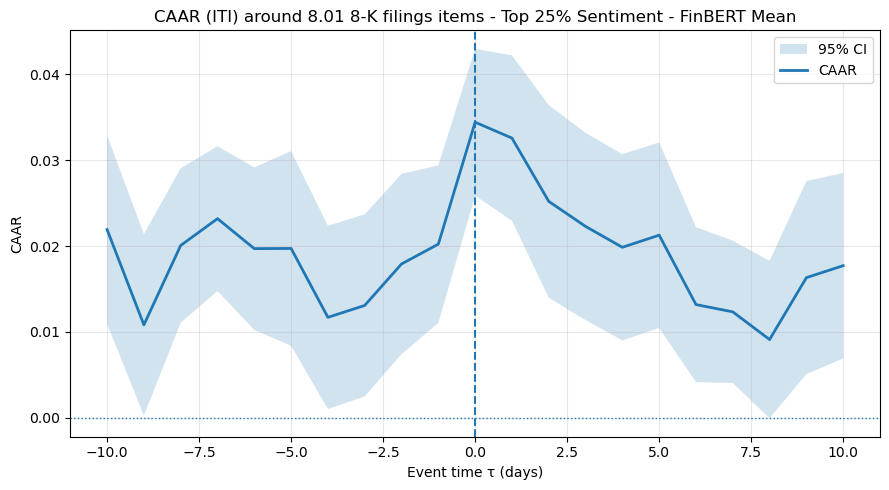

In [32]:
results_finbert_mean_top_25_iti = event_study(
        df_events=sent_finbert_mean_top_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_finbert_mean_top_25_iti = compute_caar_ci(results_finbert_mean_top_25_iti)
plot_caar_ci(caar_finbert_mean_top_25_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Top 25% Sentiment - FinBERT Mean')

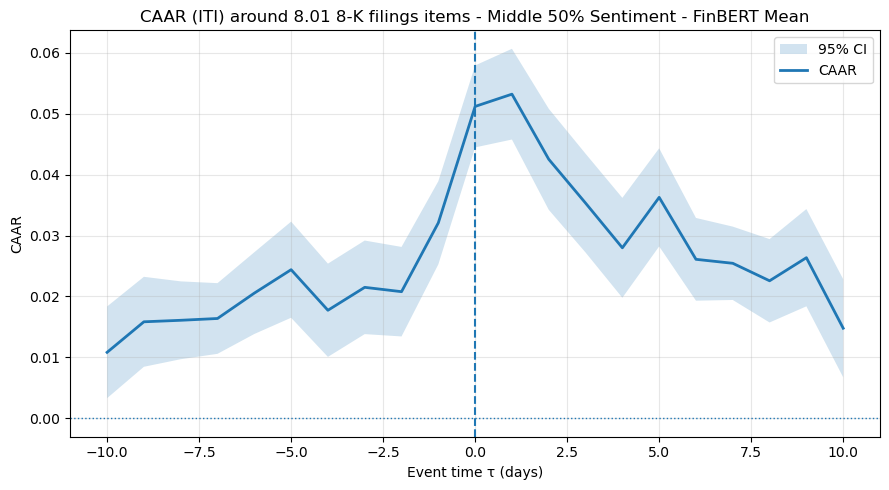

In [33]:
results_finbert_mean_middle_50_iti = event_study(
        df_events=sent_finbert_mean_middle_50.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_finbert_mean_middle_50_iti = compute_caar_ci(results_finbert_mean_middle_50_iti)
plot_caar_ci(caar_finbert_mean_middle_50_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Middle 50% Sentiment - FinBERT Mean')

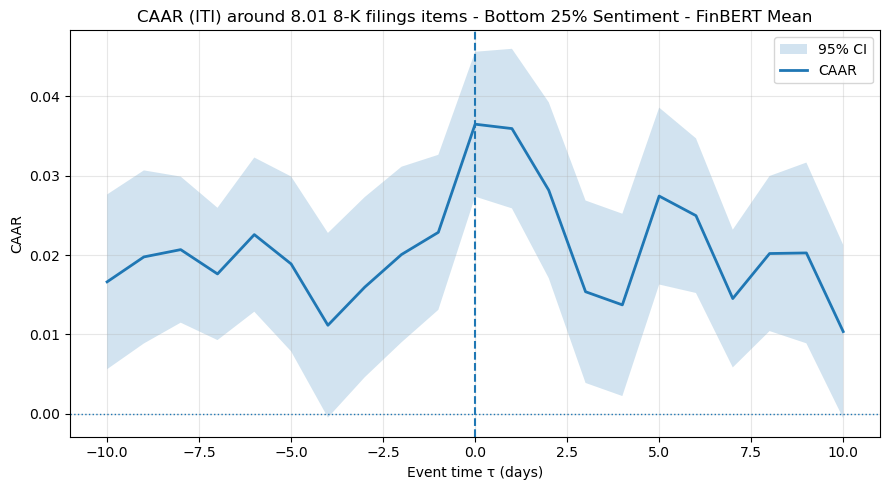

In [34]:
results_finbert_mean_bottom_25_iti = event_study(
        df_events=sent_finbert_mean_bottom_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_finbert_mean_bottom_25_iti = compute_caar_ci(results_finbert_mean_bottom_25_iti)
plot_caar_ci(caar_finbert_mean_bottom_25_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Bottom 25% Sentiment - FinBERT Mean')

In [35]:
sentiment_mistral_finbert = df_mistral_finbert.filter(pl.col('sentiment_score').is_not_null()).select(['permno', 'filing_date', 'sentiment_score'])
sentiment_mistral_finbert = sentiment_mistral_finbert.rename({'filing_date': 'event_date'})

# select top 25% sentiment scores
sent_mistral_finbert_top_25 = sentiment_mistral_finbert.filter(pl.col('sentiment_score') >= sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())

# select bottom 25% sentiment scores
sent_mistral_finbert_bottom_25 = sentiment_mistral_finbert.filter(pl.col('sentiment_score') <= sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.25)).item())

# select middle 50% sentiment scores
sent_mistral_finbert_middle_50 = sentiment_mistral_finbert.filter(
    (pl.col('sentiment_score') > sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.25)).item()) &
    (pl.col('sentiment_score') < sentiment_mistral_finbert.select(pl.col('sentiment_score').quantile(0.75)).item())
)

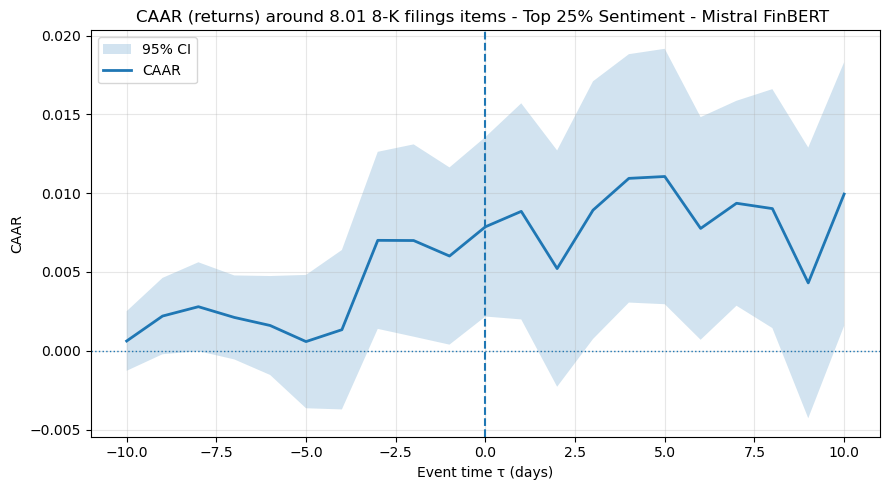

In [36]:
results_mistral_finbert_top_25_returns = event_study(
        df_events=sent_mistral_finbert_top_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_mistral_finbert_top_25_returns = compute_caar_ci(results_mistral_finbert_top_25_returns)
plot_caar_ci(caar_mistral_finbert_top_25_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Top 25% Sentiment - Mistral FinBERT ')

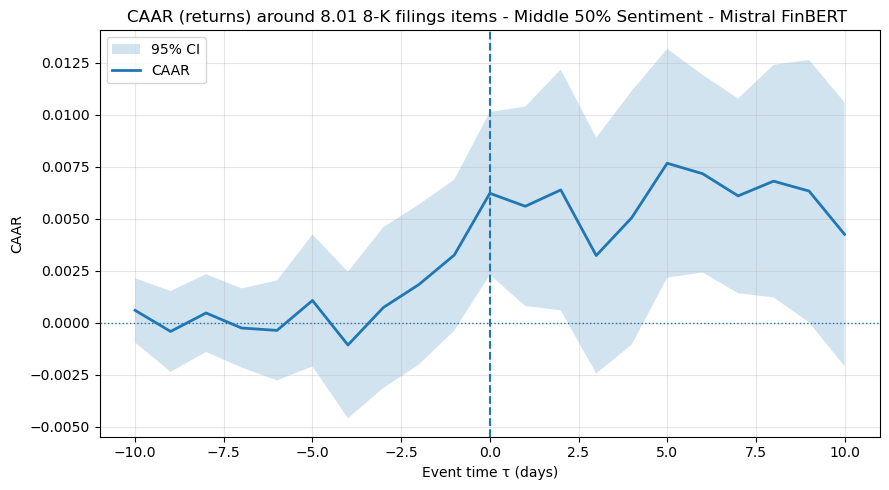

In [37]:
results_mistral_finbert_middle_50_returns = event_study(
        df_events=sent_mistral_finbert_middle_50.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_mistral_finbert_middle_50_returns = compute_caar_ci(results_mistral_finbert_middle_50_returns)
plot_caar_ci(caar_mistral_finbert_middle_50_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Middle 50% Sentiment - Mistral FinBERT ')

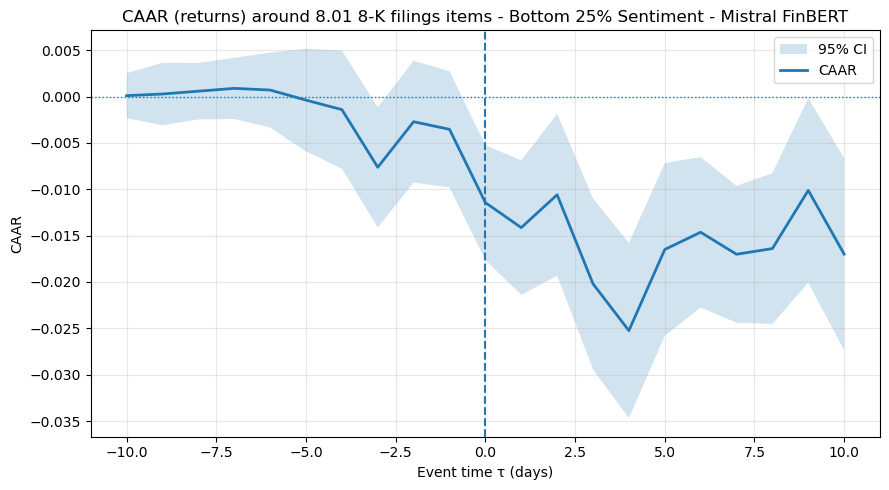

In [38]:
results_mistral_finbert_bottom_25_returns = event_study(
        df_events=sent_mistral_finbert_bottom_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='returns'
    )
caar_mistral_finbert_bottom_25_returns = compute_caar_ci(results_mistral_finbert_bottom_25_returns)
plot_caar_ci(caar_mistral_finbert_bottom_25_returns, title=f'CAAR (returns) around 8.01 8-K filings items - Bottom 25% Sentiment - Mistral FinBERT')

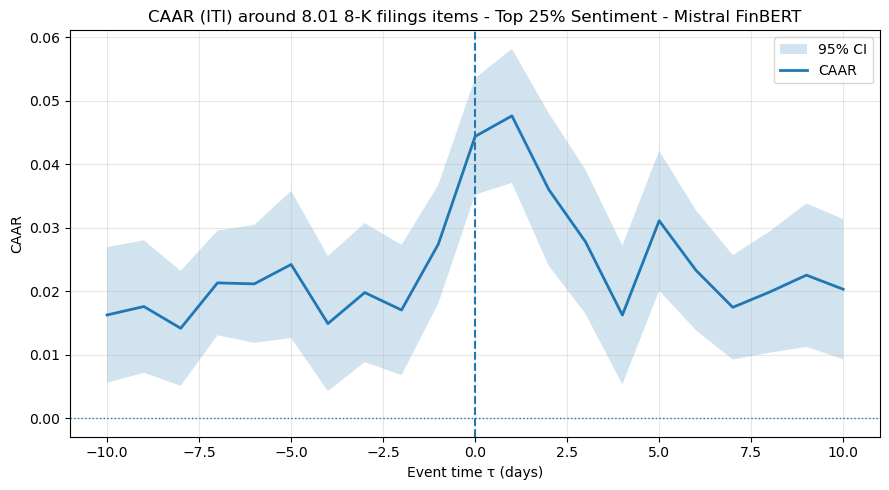

In [39]:
results_mistral_finbert_top_25_iti = event_study(
        df_events=sent_mistral_finbert_top_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_mistral_finbert_top_25_iti = compute_caar_ci(results_mistral_finbert_top_25_iti)
plot_caar_ci(caar_mistral_finbert_top_25_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Top 25% Sentiment - Mistral FinBERT')

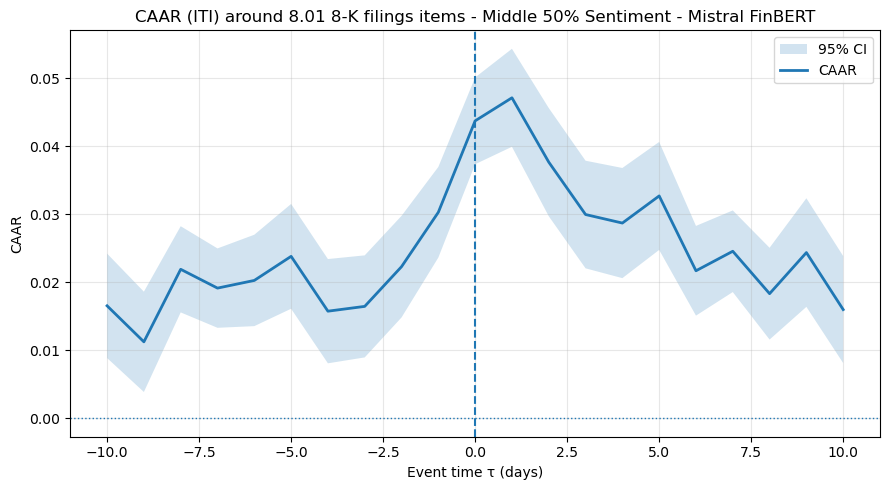

In [40]:
results_mistral_finbert_middle_50_iti = event_study(
        df_events=sent_mistral_finbert_middle_50.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_mistral_finbert_middle_50_iti = compute_caar_ci(results_mistral_finbert_middle_50_iti)
plot_caar_ci(caar_mistral_finbert_middle_50_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Middle 50% Sentiment - Mistral FinBERT')

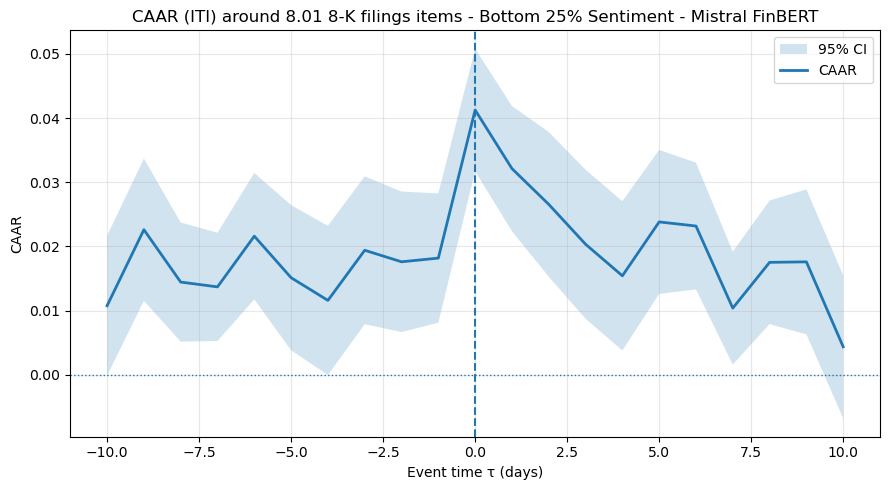

In [41]:
results_mistral_finbert_bottom_25_iti = event_study(
        df_events=sent_mistral_finbert_bottom_25.to_pandas(),
        window_before=10,
        window_after=10,
        est_window=500,
        gap=30,
        min_obs=250,
        market_model='fama-mom',
        subject='ITI'
    )
caar_mistral_finbert_bottom_25_iti = compute_caar_ci(results_mistral_finbert_bottom_25_iti)
plot_caar_ci(caar_mistral_finbert_bottom_25_iti, title=f'CAAR (ITI) around 8.01 8-K filings items - Bottom 25% Sentiment - Mistral FinBERT')

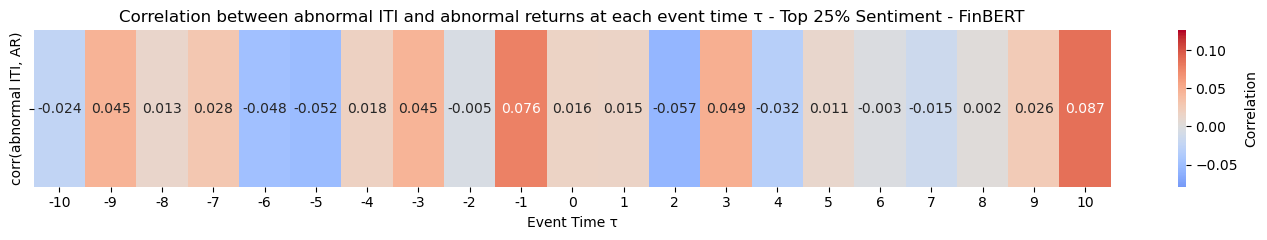

In [103]:
plot_corr_abn_iti_ar(
    results_returns=results_finbert_top_25_returns,
    results_iti=results_finbert_top_25_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Top 25% Sentiment - FinBERT"
)

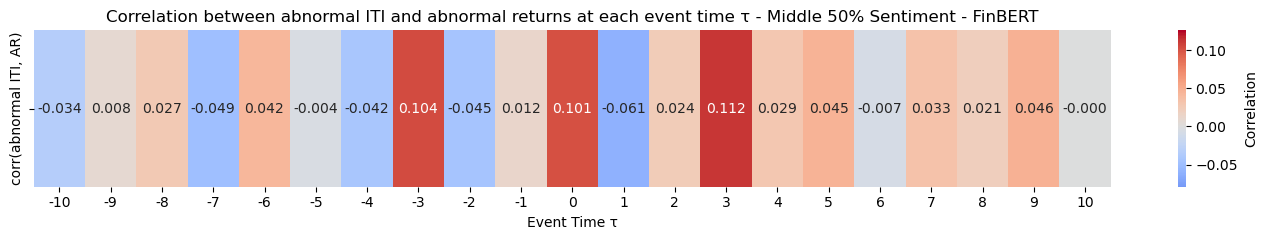

In [104]:
plot_corr_abn_iti_ar(
    results_returns=results_finbert_middle_50_returns,
    results_iti=results_finbert_middle_50_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Middle 50% Sentiment - FinBERT"
)

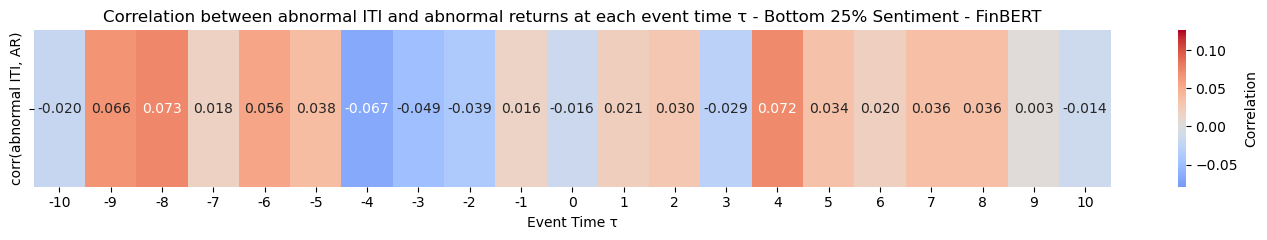

In [105]:
plot_corr_abn_iti_ar(
    results_returns=results_finbert_bottom_25_returns,
    results_iti=results_finbert_bottom_25_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Bottom 25% Sentiment - FinBERT"
)

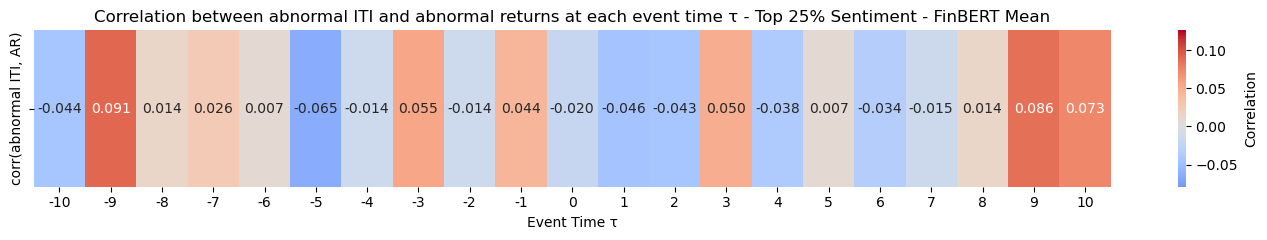

In [106]:
plot_corr_abn_iti_ar(
    results_returns=results_finbert_mean_top_25_returns,
    results_iti=results_finbert_mean_top_25_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Top 25% Sentiment - FinBERT Mean"
)

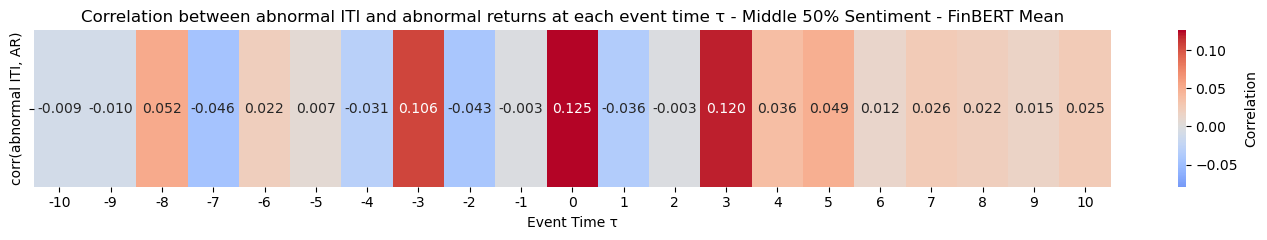

In [107]:
plot_corr_abn_iti_ar(
    results_returns=results_finbert_mean_middle_50_returns,
    results_iti=results_finbert_mean_middle_50_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Middle 50% Sentiment - FinBERT Mean"
)

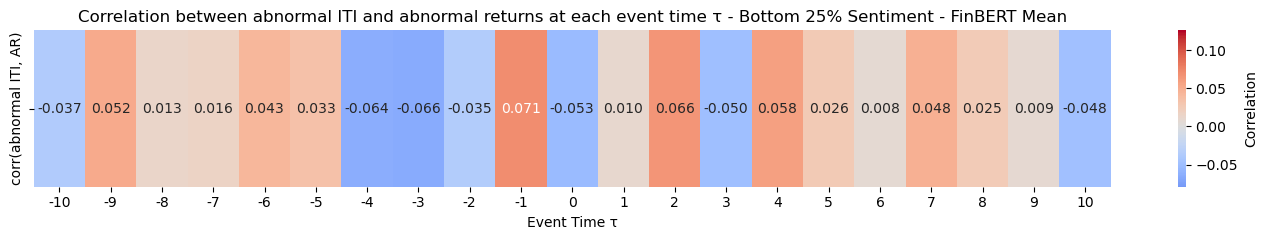

In [108]:
plot_corr_abn_iti_ar(
    results_returns=results_finbert_mean_bottom_25_returns,
    results_iti=results_finbert_mean_bottom_25_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Bottom 25% Sentiment - FinBERT Mean"
)

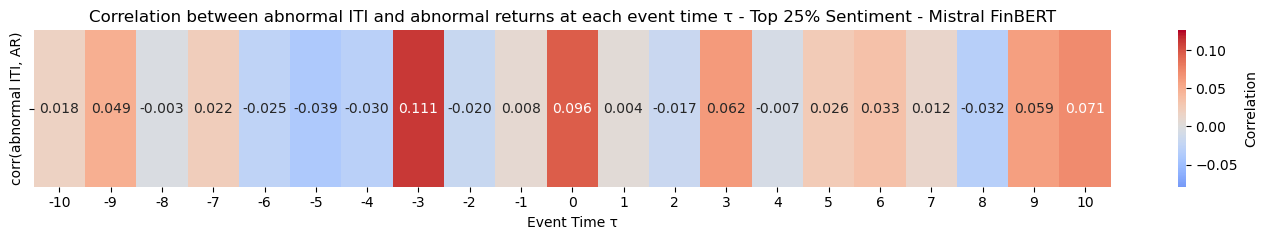

In [109]:
plot_corr_abn_iti_ar(
    results_returns=results_mistral_finbert_top_25_returns,
    results_iti=results_mistral_finbert_top_25_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Top 25% Sentiment - Mistral FinBERT"
)

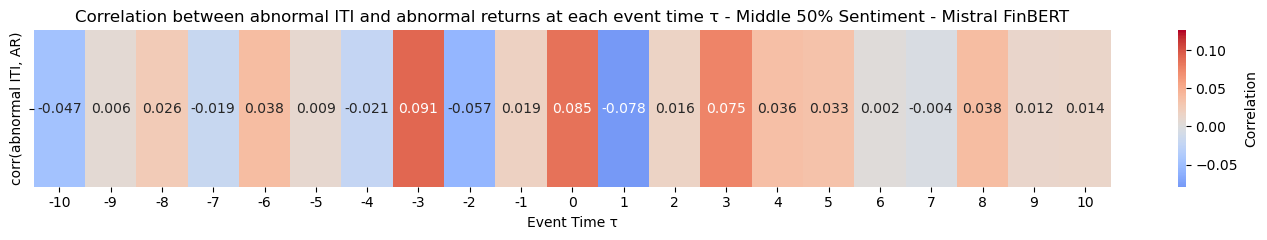

In [110]:
plot_corr_abn_iti_ar(
    results_returns=results_mistral_finbert_middle_50_returns,
    results_iti=results_mistral_finbert_middle_50_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Middle 50% Sentiment - Mistral FinBERT"
)

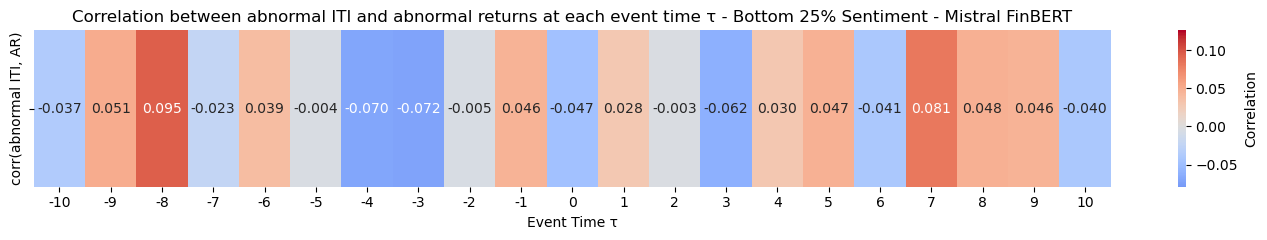

In [111]:
plot_corr_abn_iti_ar(
    results_returns=results_mistral_finbert_bottom_25_returns,
    results_iti=results_mistral_finbert_bottom_25_iti,
    title=f"Correlation between abnormal ITI and abnormal returns at each event time τ - Bottom 25% Sentiment - Mistral FinBERT"
)